### This file is designed to review and process data as provided from the diabetes.csv file.  It should be run prior to launching any other items as it feeds into the ML algorithm for training. 

#### This data processing is run on the original raw dataset, no duplicates have been identified or removed. 

In [2]:
#import dependencies
import warnings
warnings.filterwarnings('ignore')

#validation
print('done')

done


In [3]:
#import dependencies
import numpy as np
import pandas as pd
import os
from pathlib import Path
from collections import Counter

#validation
print('python dependencies loaded')

python dependencies loaded


In [4]:
# import modeling dependencies
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectPercentile
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2 , f_classif
print('modeling dependencies loaded')

modeling dependencies loaded


In [5]:
#set file path
file_path3 = Path(r'resources\diabetes.csv')

#read file into memory
diabetes_df = pd.read_csv(file_path3)

#validate load
diabetes_df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [6]:
#Dataframe Column_listing
diabetes_df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [7]:
#Determine Null Values 
nan_count = diabetes_df.isna().sum(axis = 1)
nan_count

0         0
1         0
2         0
3         0
4         0
         ..
253675    0
253676    0
253677    0
253678    0
253679    0
Length: 253680, dtype: int64

In [8]:
#Check Data types - all fields should be numeric 
diabetes_df.dtypes

Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [9]:
#Count number of each value in Diabetes 012 column
#0-no diabetes, 1-prediabetes 2-diabetes
#this is what we want our model to train on - recommend combining 1&2 into one value to make it binary 'get checked'
diabetes_df['Diabetes_012'].value_counts()

0.0    213703
2.0     35346
1.0      4631
Name: Diabetes_012, dtype: int64

In [10]:
#percentage of each value in Diabetes 012 column
diabetes_df.Diabetes_012.value_counts(normalize=True)

0.0    0.842412
2.0    0.139333
1.0    0.018255
Name: Diabetes_012, dtype: float64

In [11]:
#binning of Diabetes Status 
status_bin_range = [-1, 0, 4]

status_bins = [1, 2]

diabetes_df['Diabetes_Status'] = pd.cut(diabetes_df['Diabetes_012'], status_bin_range, labels=status_bins)

diabetes_df.Diabetes_Status.describe()

count     253680
unique         2
top            1
freq      213703
Name: Diabetes_Status, dtype: int64

In [12]:
#examine columns 
diabetes_df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes_Status'],
      dtype='object')

In [13]:
#rearrange columns
diabetes_df = diabetes_df[['Diabetes_Status', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes_012']]

In [14]:
#confirm order 
diabetes_df.head()

,Diabetes_Status,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_012
0,1,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,0.0
1,1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,0.0
2,1,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,0.0
3,1,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,0.0
4,1,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,0.0


In [15]:
#view info
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Diabetes_Status       253680 non-null  category
 1   HighBP                253680 non-null  float64 
 2   HighChol              253680 non-null  float64 
 3   CholCheck             253680 non-null  float64 
 4   BMI                   253680 non-null  float64 
 5   Smoker                253680 non-null  float64 
 6   Stroke                253680 non-null  float64 
 7   HeartDiseaseorAttack  253680 non-null  float64 
 8   PhysActivity          253680 non-null  float64 
 9   Fruits                253680 non-null  float64 
 10  Veggies               253680 non-null  float64 
 11  HvyAlcoholConsump     253680 non-null  float64 
 12  AnyHealthcare         253680 non-null  float64 
 13  NoDocbcCost           253680 non-null  float64 
 14  GenHlth               253680 non-nul

In [16]:
diabetes_df['Diabetes_Status'].value_counts()

1    213703
2     39977
Name: Diabetes_Status, dtype: int64

In [17]:
#Count number of each value in HighBP Column
# 0 - noHBP, 1 -  HBP 
diabetes_df['HighBP'].value_counts()


0.0    144851
1.0    108829
Name: HighBP, dtype: int64

In [18]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Diabetes_Status       253680 non-null  category
 1   HighBP                253680 non-null  float64 
 2   HighChol              253680 non-null  float64 
 3   CholCheck             253680 non-null  float64 
 4   BMI                   253680 non-null  float64 
 5   Smoker                253680 non-null  float64 
 6   Stroke                253680 non-null  float64 
 7   HeartDiseaseorAttack  253680 non-null  float64 
 8   PhysActivity          253680 non-null  float64 
 9   Fruits                253680 non-null  float64 
 10  Veggies               253680 non-null  float64 
 11  HvyAlcoholConsump     253680 non-null  float64 
 12  AnyHealthcare         253680 non-null  float64 
 13  NoDocbcCost           253680 non-null  float64 
 14  GenHlth               253680 non-nul

In [19]:
#percentage of each value 
diabetes_df.HighBP.value_counts(normalize=True)

0.0    0.570999
1.0    0.429001
Name: HighBP, dtype: float64

In [20]:
#Count number of each value in HighChol Column
#0 = no high cholesterol 1 = high cholesterol
diabetes_df['HighChol'].value_counts()


0.0    146089
1.0    107591
Name: HighChol, dtype: int64

In [21]:
#percentage
diabetes_df.HighChol.value_counts(normalize=True)

0.0    0.575879
1.0    0.424121
Name: HighChol, dtype: float64

In [22]:
#Count number of each value in CholCheck Column
#0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years
diabetes_df['CholCheck'].value_counts()


1.0    244210
0.0      9470
Name: CholCheck, dtype: int64

In [23]:
#percentage
diabetes_df.CholCheck.value_counts(normalize=True)

1.0    0.96267
0.0    0.03733
Name: CholCheck, dtype: float64

In [24]:
#Count number of each value in BMI Column
#calculate BMI by dividing weight in pounds (lb) by height in inches (in) squared and multiplying by a conversion factor of 703
#Will need to have user enter height and weight of subject 

diabetes_df['BMI'].value_counts()


27.0    24606
26.0    20562
24.0    19550
25.0    17146
28.0    16545
        ...  
85.0        1
91.0        1
86.0        1
90.0        1
78.0        1
Name: BMI, Length: 84, dtype: int64

In [25]:
#Determine bucketing for BMI values 
diabetes_df.BMI.describe()

count    253680.000000
mean         28.382364
std           6.608694
min          12.000000
25%          24.000000
50%          27.000000
75%          31.000000
max          98.000000
Name: BMI, dtype: float64

In [26]:
#percentage
diabetes_df.BMI.value_counts(normalize=True)

27.0    0.096996
26.0    0.081055
24.0    0.077066
25.0    0.067589
28.0    0.065220
          ...   
85.0    0.000004
91.0    0.000004
86.0    0.000004
90.0    0.000004
78.0    0.000004
Name: BMI, Length: 84, dtype: float64

In [27]:
# BMI Binning 
# https://qpp.cms.gov/docs/QPP_quality_measure_specifications/CQM-Measures/2019_Measure_128_MIPSCQM.pdf
# BMI 1 is less than 18.5
# BMI 2  is 18.5 to 24.9,
# BMI 3  is 25.0 to 29.9
# BMI 4 is 30.0 or higher

In [28]:
# define ranges
bmi_bin_range = [0, 18.5, 24.9, 29.9, 100]

#define bins 
bmi_bins = [1, 2, 3, 4]

#sort data into bins 
diabetes_df['BMI_Range'] = pd.cut(diabetes_df['BMI'], bmi_bin_range, labels=bmi_bins)

#describe model after binning 
diabetes_df.BMI_Range.describe()

count     253680
unique         4
top            3
freq       93749
Name: BMI_Range, dtype: int64

In [29]:
#Validate columns post binning
diabetes_df.columns

Index(['Diabetes_Status', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes_012', 'BMI_Range'],
      dtype='object')

In [30]:
#re-sort columns 
diabetes_df = diabetes_df[['Diabetes_Status', 'HighBP', 'HighChol', 'CholCheck', 'BMI_Range', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes_012', 'BMI']]

In [31]:
#view data 
diabetes_df.head()

,Diabetes_Status,HighBP,HighChol,CholCheck,BMI_Range,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_012,BMI
0,1,1.0,1.0,1.0,4,1.0,0.0,0.0,0.0,0.0,...,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,0.0,40.0
1,1,0.0,0.0,0.0,3,1.0,0.0,0.0,1.0,0.0,...,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,0.0,25.0
2,1,1.0,1.0,1.0,3,0.0,0.0,0.0,0.0,1.0,...,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,0.0,28.0
3,1,1.0,0.0,1.0,3,0.0,0.0,0.0,1.0,1.0,...,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,0.0,27.0
4,1,1.0,1.0,1.0,2,0.0,0.0,0.0,1.0,1.0,...,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,0.0,24.0


In [32]:
#Count number of each value in Smoker Column
#Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes
diabetes_df['Smoker'].value_counts()


0.0    141257
1.0    112423
Name: Smoker, dtype: int64

In [33]:
#percentage
diabetes_df.Smoker.value_counts(normalize=True)

0.0    0.556831
1.0    0.443169
Name: Smoker, dtype: float64

In [34]:
#Count number of each value in Stroke Column
#(Ever told) you had a stroke. 0 = no 1 = yes
diabetes_df['Stroke'].value_counts()

0.0    243388
1.0     10292
Name: Stroke, dtype: int64

In [35]:
#Percentage 
diabetes_df.Stroke.value_counts(normalize=True)

0.0    0.959429
1.0    0.040571
Name: Stroke, dtype: float64

In [36]:
#Count number of each value in HeartDiseaseorAttack Column
#coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes
diabetes_df['HeartDiseaseorAttack'].value_counts()


0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64

In [37]:
#percentage
diabetes_df.HeartDiseaseorAttack.value_counts(normalize=True)

0.0    0.905814
1.0    0.094186
Name: HeartDiseaseorAttack, dtype: float64

In [38]:
#Count number of each value in PhysActivity Column
#physical activity in past 30 days - not including job 0 = no 1 = yes
diabetes_df['PhysActivity'].value_counts()


1.0    191920
0.0     61760
Name: PhysActivity, dtype: int64

In [39]:
#percentage
diabetes_df.PhysActivity.value_counts(normalize=True)

1.0    0.756544
0.0    0.243456
Name: PhysActivity, dtype: float64

In [40]:
#Count number of each value in Fruits Column
#Consume Fruit 1 or more times per day 0 = no 1 = yes
diabetes_df['Fruits'].value_counts()


1.0    160898
0.0     92782
Name: Fruits, dtype: int64

In [41]:
#percentage
diabetes_df.Fruits.value_counts(normalize=True)

1.0    0.634256
0.0    0.365744
Name: Fruits, dtype: float64

In [42]:
#Count number of each value in Veggies Column
#Consume Vegetables 1 or more times per day 0 = no 1 = yes
diabetes_df['Veggies'].value_counts()


1.0    205841
0.0     47839
Name: Veggies, dtype: int64

In [43]:
#percentage
diabetes_df.Veggies.value_counts(normalize=True)

1.0    0.81142
0.0    0.18858
Name: Veggies, dtype: float64

In [44]:
#Count number of each value in HvyAlcoholConsump Column
#Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no 1 = yes
diabetes_df['HvyAlcoholConsump'].value_counts()

0.0    239424
1.0     14256
Name: HvyAlcoholConsump, dtype: int64

In [45]:
#percentage
diabetes_df.HvyAlcoholConsump.value_counts(normalize=True)

0.0    0.943803
1.0    0.056197
Name: HvyAlcoholConsump, dtype: float64

In [46]:
#Count number of each value in AnyHealthcare Column
#Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes
diabetes_df['AnyHealthcare'].value_counts()

1.0    241263
0.0     12417
Name: AnyHealthcare, dtype: int64

In [47]:
#percentage
diabetes_df.AnyHealthcare.value_counts(normalize=True)

1.0    0.951053
0.0    0.048947
Name: AnyHealthcare, dtype: float64

In [48]:
#Count number of each value in NoDocbcCost Column
#Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes
diabetes_df['NoDocbcCost'].value_counts()

0.0    232326
1.0     21354
Name: NoDocbcCost, dtype: int64

In [49]:
#percentage
diabetes_df.NoDocbcCost.value_counts(normalize=True)

0.0    0.915823
1.0    0.084177
Name: NoDocbcCost, dtype: float64

In [50]:
#Count number of each value in GenHlth Column
#Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor
diabetes_df['GenHlth'].value_counts()

2.0    89084
3.0    75646
1.0    45299
4.0    31570
5.0    12081
Name: GenHlth, dtype: int64

In [51]:
#percentage
diabetes_df.GenHlth.value_counts(normalize=True)

2.0    0.351167
3.0    0.298195
1.0    0.178567
4.0    0.124448
5.0    0.047623
Name: GenHlth, dtype: float64

In [52]:
#Count number of each value in MentHlth Column
#Now thinking about your mental health, which includes stress, depression, and problems with 
#emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days
diabetes_df['MentHlth'].value_counts()


0.0     175680
2.0      13054
30.0     12088
5.0       9030
1.0       8538
3.0       7381
10.0      6373
15.0      5505
4.0       3789
20.0      3364
7.0       3100
25.0      1188
14.0      1167
6.0        988
8.0        639
12.0       398
28.0       327
21.0       227
29.0       158
18.0        97
9.0         91
16.0        88
27.0        79
22.0        63
17.0        54
26.0        45
11.0        41
13.0        41
23.0        38
24.0        33
19.0        16
Name: MentHlth, dtype: int64

In [53]:
#percentage
diabetes_df.MentHlth.value_counts(normalize=True)

0.0     0.692526
2.0     0.051459
30.0    0.047651
5.0     0.035596
1.0     0.033657
3.0     0.029096
10.0    0.025122
15.0    0.021701
4.0     0.014936
20.0    0.013261
7.0     0.012220
25.0    0.004683
14.0    0.004600
6.0     0.003895
8.0     0.002519
12.0    0.001569
28.0    0.001289
21.0    0.000895
29.0    0.000623
18.0    0.000382
9.0     0.000359
16.0    0.000347
27.0    0.000311
22.0    0.000248
17.0    0.000213
26.0    0.000177
11.0    0.000162
13.0    0.000162
23.0    0.000150
24.0    0.000130
19.0    0.000063
Name: MentHlth, dtype: float64

In [54]:
#### Buckets 
# 0 Days 
# 1-5 Days
# 6-10 Days
# 11-15 Days
# 16-20 Days
# 21-25 Days
# 26-30 Days

In [55]:
mhealth_bin_range = [-1, 5, 10, 15, 20, 25, 32]

mhealth_bins = [1, 2, 3, 4, 5, 6]

diabetes_df['Mental_Health_Range'] = pd.cut(diabetes_df['MentHlth'], mhealth_bin_range, labels=mhealth_bins)

diabetes_df.Mental_Health_Range.describe()

count     253680
unique         6
top            1
freq      217472
Name: Mental_Health_Range, dtype: int64

In [56]:
#reorder columns 
diabetes_df = diabetes_df[['Diabetes_Status', 'HighBP', 'HighChol', 'CholCheck', 'BMI_Range',
       'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'Mental_Health_Range', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income', 'Diabetes_012', 'BMI', 'MentHlth']]

In [57]:
#post bucketing column validation 
diabetes_df.columns

Index(['Diabetes_Status', 'HighBP', 'HighChol', 'CholCheck', 'BMI_Range',
       'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'Mental_Health_Range', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income', 'Diabetes_012', 'BMI', 'MentHlth'],
      dtype='object')

In [58]:
#View data
diabetes_df.head()

,Diabetes_Status,HighBP,HighChol,CholCheck,BMI_Range,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,Mental_Health_Range,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_012,BMI,MentHlth
0,1,1.0,1.0,1.0,4,1.0,0.0,0.0,0.0,0.0,...,4,15.0,1.0,0.0,9.0,4.0,3.0,0.0,40.0,18.0
1,1,0.0,0.0,0.0,3,1.0,0.0,0.0,1.0,0.0,...,1,0.0,0.0,0.0,7.0,6.0,1.0,0.0,25.0,0.0
2,1,1.0,1.0,1.0,3,0.0,0.0,0.0,0.0,1.0,...,6,30.0,1.0,0.0,9.0,4.0,8.0,0.0,28.0,30.0
3,1,1.0,0.0,1.0,3,0.0,0.0,0.0,1.0,1.0,...,1,0.0,0.0,0.0,11.0,3.0,6.0,0.0,27.0,0.0
4,1,1.0,1.0,1.0,2,0.0,0.0,0.0,1.0,1.0,...,1,0.0,0.0,0.0,11.0,5.0,4.0,0.0,24.0,3.0


In [59]:
#Table info 
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Diabetes_Status       253680 non-null  category
 1   HighBP                253680 non-null  float64 
 2   HighChol              253680 non-null  float64 
 3   CholCheck             253680 non-null  float64 
 4   BMI_Range             253680 non-null  category
 5   Smoker                253680 non-null  float64 
 6   Stroke                253680 non-null  float64 
 7   HeartDiseaseorAttack  253680 non-null  float64 
 8   PhysActivity          253680 non-null  float64 
 9   Fruits                253680 non-null  float64 
 10  Veggies               253680 non-null  float64 
 11  HvyAlcoholConsump     253680 non-null  float64 
 12  AnyHealthcare         253680 non-null  float64 
 13  NoDocbcCost           253680 non-null  float64 
 14  GenHlth               253680 non-nul

In [60]:
#Count number of each value in PhysHlth Column
#Now thinking about your physical health, which includes physical illness and injury, for how many days 
#during the past 30 days was your physical health not good? scale 1-30 days
diabetes_df['PhysHlth'].value_counts()


0.0     160052
30.0     19400
2.0      14764
1.0      11388
3.0       8495
5.0       7622
10.0      5595
15.0      4916
4.0       4542
7.0       4538
20.0      3273
14.0      2587
25.0      1336
6.0       1330
8.0        809
21.0       663
12.0       578
28.0       522
29.0       215
9.0        179
18.0       152
16.0       112
27.0        99
17.0        96
24.0        72
22.0        70
26.0        69
13.0        68
11.0        60
23.0        56
19.0        22
Name: PhysHlth, dtype: int64

In [61]:
#percentage
diabetes_df.PhysHlth.value_counts(normalize=True)

0.0     0.630921
30.0    0.076474
2.0     0.058199
1.0     0.044891
3.0     0.033487
5.0     0.030046
10.0    0.022055
15.0    0.019379
4.0     0.017904
7.0     0.017889
20.0    0.012902
14.0    0.010198
25.0    0.005266
6.0     0.005243
8.0     0.003189
21.0    0.002614
12.0    0.002278
28.0    0.002058
29.0    0.000848
9.0     0.000706
18.0    0.000599
16.0    0.000442
27.0    0.000390
17.0    0.000378
24.0    0.000284
22.0    0.000276
26.0    0.000272
13.0    0.000268
11.0    0.000237
23.0    0.000221
19.0    0.000087
Name: PhysHlth, dtype: float64

In [62]:
#bins
# 0 Days
# 1-5 Days
# 6-10 Days
# 11-15 Days
# 16-20 Days
# 21-25 Days
# 26-30 Days

In [63]:
phealth_bin_range = [-1, 5, 10, 15, 20, 25, 32]

phealth_bins = [1, 2, 3, 4, 5, 6]

diabetes_df['Physical_Health_Range'] = pd.cut(diabetes_df['PhysHlth'], phealth_bin_range, labels=phealth_bins)

diabetes_df.Physical_Health_Range.describe()

count     253680
unique         6
top            1
freq      206863
Name: Physical_Health_Range, dtype: int64

In [64]:
#post binning column validation 
diabetes_df.columns

Index(['Diabetes_Status', 'HighBP', 'HighChol', 'CholCheck', 'BMI_Range',
       'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'Mental_Health_Range', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income', 'Diabetes_012', 'BMI', 'MentHlth',
       'Physical_Health_Range'],
      dtype='object')

In [65]:
#view data
diabetes_df.head()

,Diabetes_Status,HighBP,HighChol,CholCheck,BMI_Range,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_012,BMI,MentHlth,Physical_Health_Range
0,1,1.0,1.0,1.0,4,1.0,0.0,0.0,0.0,0.0,...,15.0,1.0,0.0,9.0,4.0,3.0,0.0,40.0,18.0,3
1,1,0.0,0.0,0.0,3,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,7.0,6.0,1.0,0.0,25.0,0.0,1
2,1,1.0,1.0,1.0,3,0.0,0.0,0.0,0.0,1.0,...,30.0,1.0,0.0,9.0,4.0,8.0,0.0,28.0,30.0,6
3,1,1.0,0.0,1.0,3,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,11.0,3.0,6.0,0.0,27.0,0.0,1
4,1,1.0,1.0,1.0,2,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,11.0,5.0,4.0,0.0,24.0,3.0,1


In [66]:
#reorganize columns 
diabetes_df = diabetes_df[['Diabetes_Status', 'HighBP', 'HighChol', 'CholCheck', 'BMI_Range',
       'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'Mental_Health_Range', 'Physical_Health_Range', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income', 'Diabetes_012', 'BMI', 'MentHlth', 'PhysHlth']]

In [67]:
#table info
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   Diabetes_Status        253680 non-null  category
 1   HighBP                 253680 non-null  float64 
 2   HighChol               253680 non-null  float64 
 3   CholCheck              253680 non-null  float64 
 4   BMI_Range              253680 non-null  category
 5   Smoker                 253680 non-null  float64 
 6   Stroke                 253680 non-null  float64 
 7   HeartDiseaseorAttack   253680 non-null  float64 
 8   PhysActivity           253680 non-null  float64 
 9   Fruits                 253680 non-null  float64 
 10  Veggies                253680 non-null  float64 
 11  HvyAlcoholConsump      253680 non-null  float64 
 12  AnyHealthcare          253680 non-null  float64 
 13  NoDocbcCost            253680 non-null  float64 
 14  GenHlth             

In [68]:
#Count number of each value in DiffWalk Column
#Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes
diabetes_df['DiffWalk'].value_counts()


0.0    211005
1.0     42675
Name: DiffWalk, dtype: int64

In [69]:
#percentage
diabetes_df.DiffWalk.value_counts(normalize=True)

0.0    0.831776
1.0    0.168224
Name: DiffWalk, dtype: float64

In [70]:
#Count number of each value in Sex Column
#0 = female 1 = male
diabetes_df['Sex'].value_counts()

0.0    141974
1.0    111706
Name: Sex, dtype: int64

In [71]:
#percentage
diabetes_df.Sex.value_counts(normalize=True)

0.0    0.559658
1.0    0.440342
Name: Sex, dtype: float64

In [72]:
#Count number of each value in Age Column
#13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older
#link to codebook here: https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf
diabetes_df['Age'].value_counts()

9.0     33244
10.0    32194
8.0     30832
7.0     26314
11.0    23533
6.0     19819
13.0    17363
5.0     16157
12.0    15980
4.0     13823
3.0     11123
2.0      7598
1.0      5700
Name: Age, dtype: int64

In [73]:
#Percentage
diabetes_df.Age.value_counts(normalize=True)

9.0     0.131047
10.0    0.126908
8.0     0.121539
7.0     0.103729
11.0    0.092766
6.0     0.078126
13.0    0.068444
5.0     0.063690
12.0    0.062993
4.0     0.054490
3.0     0.043847
2.0     0.029951
1.0     0.022469
Name: Age, dtype: float64

In [74]:
#Count number of each value in Education Column
#Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten 
#2 = Grades 1 through 8 (Elementary) 3 = Grades 9 through 11 (Some high school) 4 = Grade 12 or GED (High school graduate) 
#5 = College 1 year to 3 years (Some college or technical school) 6 = College 4 years or more (College graduate)
#link to codebook here: https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf
diabetes_df['Education'].value_counts()


6.0    107325
5.0     69910
4.0     62750
3.0      9478
2.0      4043
1.0       174
Name: Education, dtype: int64

In [75]:
#percentage
diabetes_df.Education.value_counts(normalize=True)

6.0    0.423072
5.0    0.275583
4.0    0.247359
3.0    0.037362
2.0    0.015937
1.0    0.000686
Name: Education, dtype: float64

In [76]:
#Count number of each value in Income Column
#Income scale (INCOME2 see codebook) scale 1-8 1 = less than $10,000 5 = less than $35,000 8 = $75,000 or more
#link to codebook here https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf
diabetes_df['Income'].value_counts()


8.0    90385
7.0    43219
6.0    36470
5.0    25883
4.0    20135
3.0    15994
2.0    11783
1.0     9811
Name: Income, dtype: int64

In [77]:
#percentage
diabetes_df.Income.value_counts(normalize=True)

8.0    0.356295
7.0    0.170368
6.0    0.143764
5.0    0.102030
4.0    0.079372
3.0    0.063048
2.0    0.046448
1.0    0.038675
Name: Income, dtype: float64

In [78]:
#visualize data for further analysis 
#Code suggestion per developer of dataset 

df_vis= diabetes_df.copy() 

print('done')

done


In [79]:
#assess number of unique values for each column 
unique_values = {}
for col in df_vis.columns:
    unique_values[col] = df_vis[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
Diabetes_Status,2
HighBP,2
HighChol,2
CholCheck,2
BMI_Range,4
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


In [80]:
#count number of columns
cols = list(df_vis.columns)
cols_df=cols[1:]

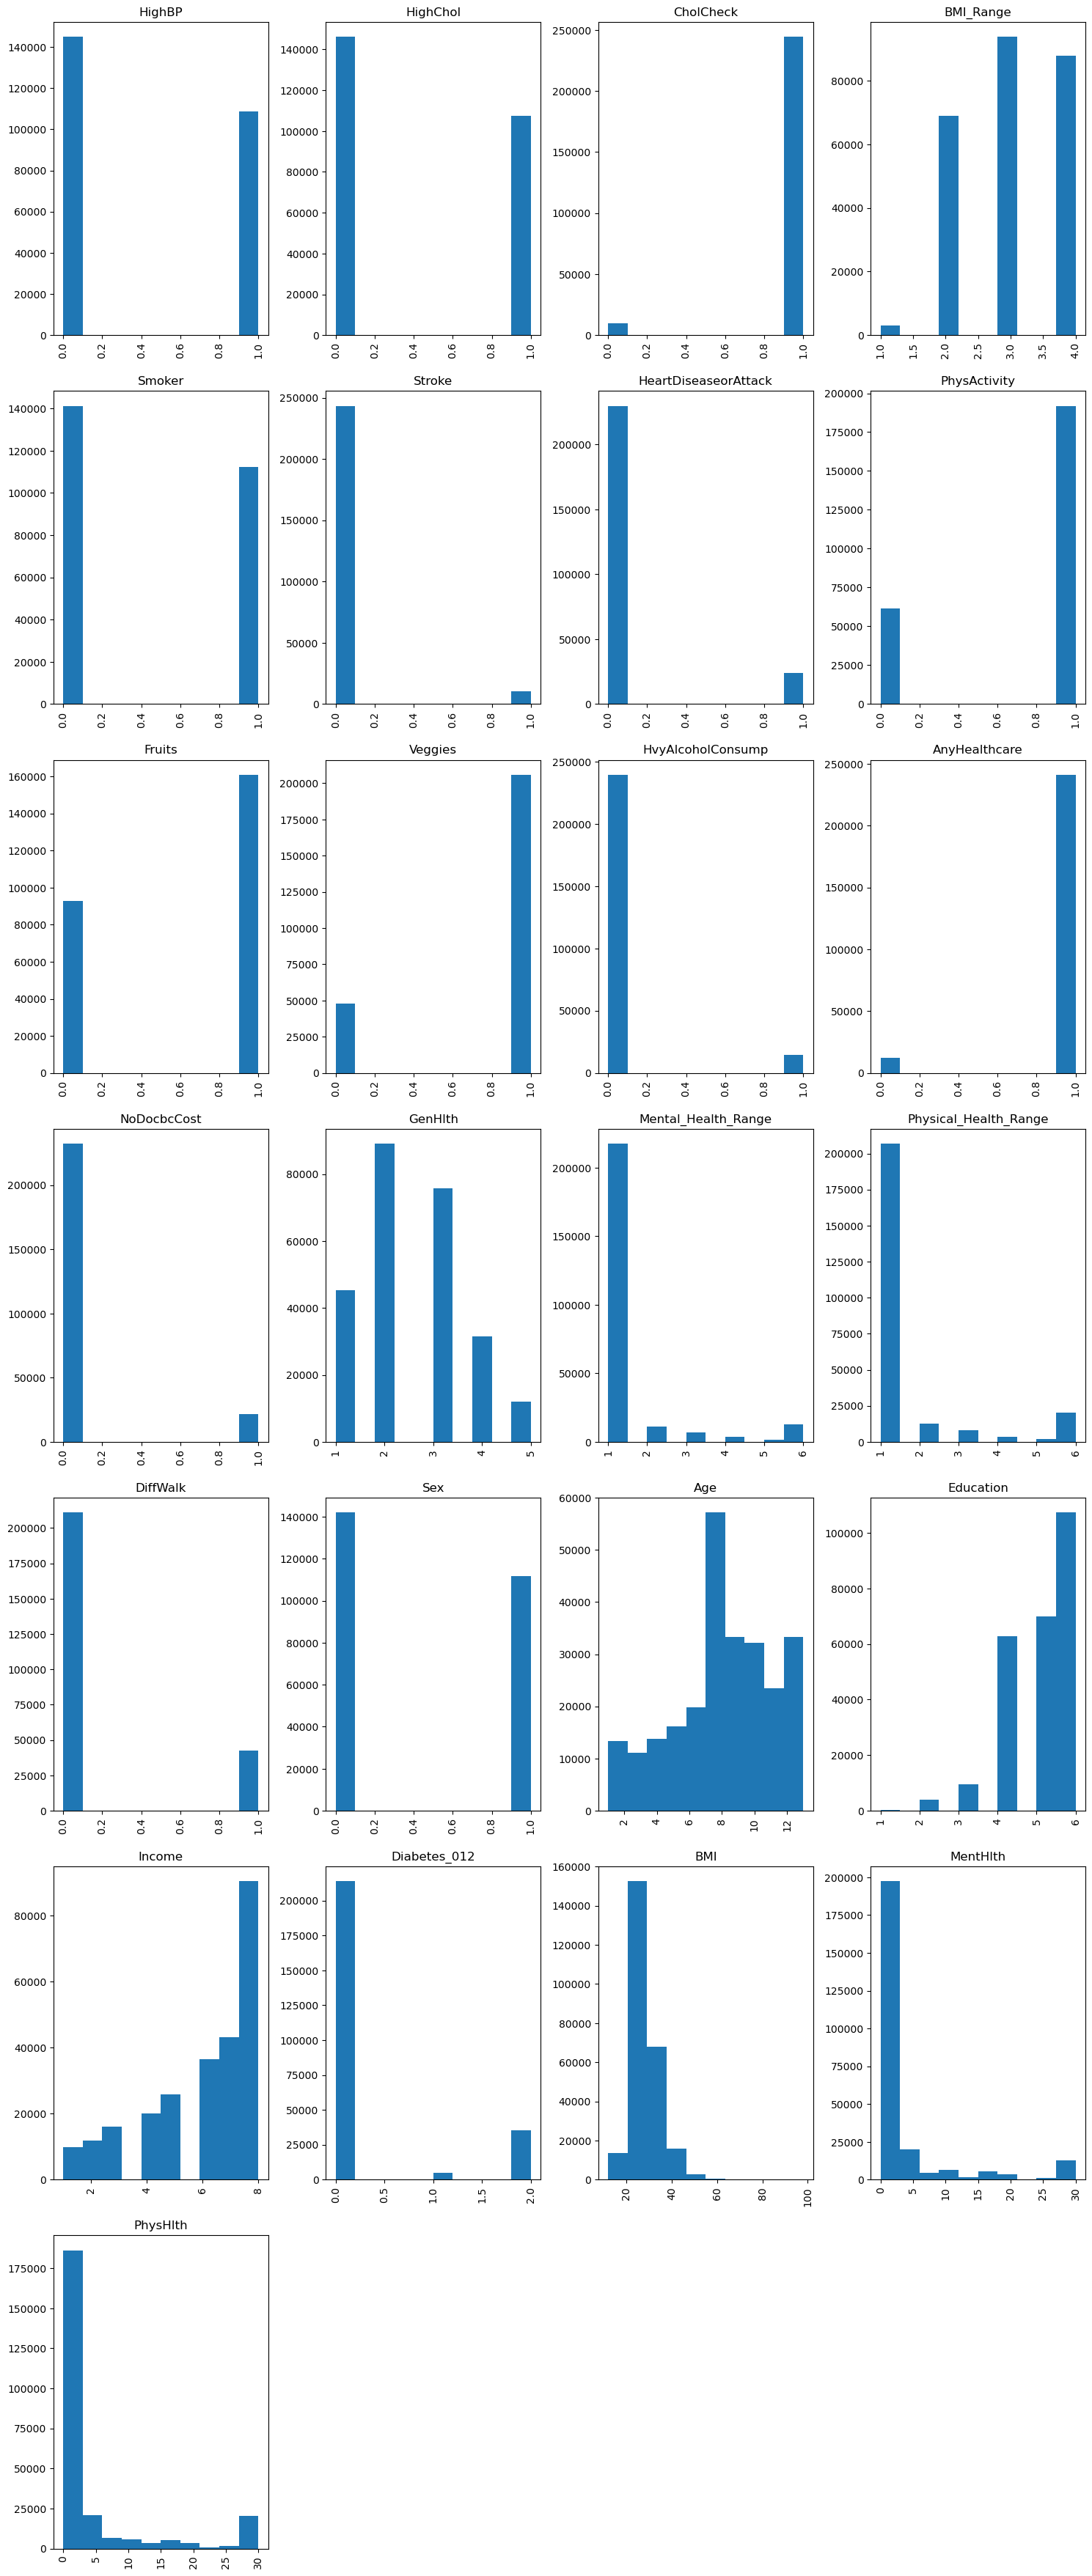

In [81]:
#visualize distributions of answers 
plt.figure(figsize=(15,40))
for i in range(len(cols_df)):
    plt.subplot(8,4,i+1)
    plt.title(cols_df[i])
    plt.xticks(rotation=90)
    plt.hist(df_vis[cols_df[i]])
    
plt.tight_layout()

In [82]:
# pie plot of diabetes ratio 
plt.figure(figsize=(8,6))
labels = ['No Diabetes', 'Diabetes']
sizes = [df_vis['Diabetes_Status'].value_counts()[0], df_vis['Diabetes_Status'].value_counts()[1]]
colors = ['grey', 'lightcoral']
plt.pie(sizes, labels=labels, autopct='%.1f%%', colors=colors, data = df_vis);

KeyError: 0

<Figure size 800x600 with 0 Axes>

In [ ]:
diabetes_df.drop('Diabetes_Status', axis=1).corrwith(diabetes_df.Diabetes_Status).plot(kind='bar', grid=True, figsize=(15, 6)
, title="Correlation with Diabetes_Status",color="blue");

Highly Correlated
- High BP
- High Cholesterol
- Cholestoral Check
- Smoker
- Stroke
- Heart Disease or  Heart Attack
- General Health
- Difficulty Walking
- Sex
- Age
- BMI
- Mental Health Days
- Physical Health Days 

Loosely Correlated
- Physical Activity
- Fruits
- Veggies
- Heavy Alcohol Consumption
- Any Healthcare
- No Doctor due to cost 
- Education
- Income 

In [83]:
#Preprocessing 

diabetes_df.columns

Index(['Diabetes_Status', 'HighBP', 'HighChol', 'CholCheck', 'BMI_Range',
       'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'Mental_Health_Range', 'Physical_Health_Range', 'DiffWalk',
       'Sex', 'Age', 'Education', 'Income', 'Diabetes_012', 'BMI', 'MentHlth',
       'PhysHlth'],
      dtype='object')

In [84]:
#drop original columns from binning 

#drop diabetes_012 
diabetes_df = diabetes_df.drop(["Diabetes_012"], axis=1)

print("done")


done


In [85]:
#drop BMI
diabetes_df = diabetes_df.drop(["BMI"], axis=1)

print("done")

done


In [86]:
#drop MentHlth
diabetes_df = diabetes_df.drop(["MentHlth"], axis=1)

print("done")

done


In [87]:
#drop PhysHlth
diabetes_df = diabetes_df.drop(["PhysHlth"], axis=1)

print("done")

done


In [88]:
diabetes_df.columns

Index(['Diabetes_Status', 'HighBP', 'HighChol', 'CholCheck', 'BMI_Range',
       'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'Mental_Health_Range', 'Physical_Health_Range', 'DiffWalk',
       'Sex', 'Age', 'Education', 'Income'],
      dtype='object')

In [89]:
#split target column out of data 
y = diabetes_df['Diabetes_Status']

y

0         1
1         1
2         1
3         1
4         1
         ..
253675    1
253676    2
253677    1
253678    1
253679    2
Name: Diabetes_Status, Length: 253680, dtype: category
Categories (2, int64): [1 < 2]

In [90]:
x = diabetes_df.drop(['Diabetes_Status'], axis=1)

x

,HighBP,HighChol,CholCheck,BMI_Range,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,Mental_Health_Range,Physical_Health_Range,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,4,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,4,3,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,3,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,3.0,1,1,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,1.0,3,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,5.0,6,6,1.0,0.0,9.0,4.0,8.0
3,1.0,0.0,1.0,3,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,1,1,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,1.0,2,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,1,1,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,1.0,4,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,1,1,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,1,1,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,1.0,3,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,1,1,0.0,0.0,2.0,5.0,2.0
253678,1.0,0.0,1.0,2,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,1,1,0.0,1.0,7.0,5.0,1.0


In [91]:
X_train , X_test , y_train , y_test = train_test_split(x,y , test_size=0.35, random_state=44, shuffle =True)

print("done")

done


In [92]:
diabetes_df.to_csv('results/diabetes_raw_data.csv', encoding='utf-8')
print('done')

done


Validated on 2/3/23 - File runs and processes readout file correctly. 